## Imports

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Get the Data

In [39]:
df = pd.read_csv('mpg.csv')

### Checking out information and description of data

In [40]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [41]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [42]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Exploratory Data Analysis

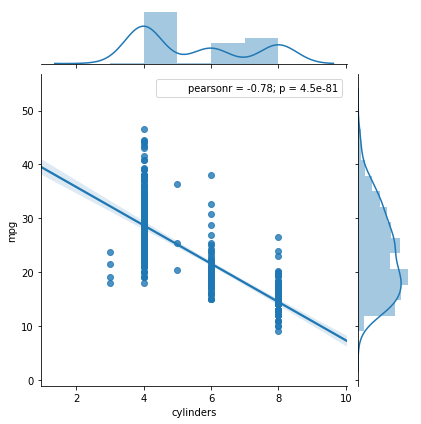

In [43]:
sns.jointplot(x="cylinders", y="mpg", data=df, kind ='reg')

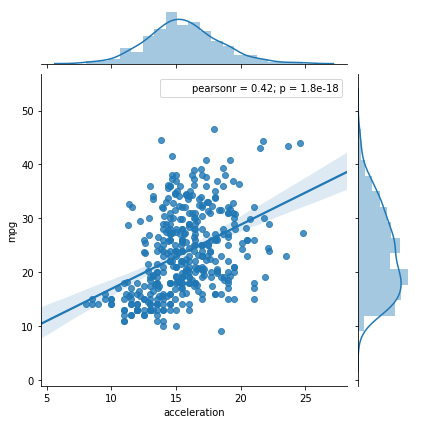

In [44]:
sns.jointplot(x='acceleration', y='mpg', data=df, kind='reg')

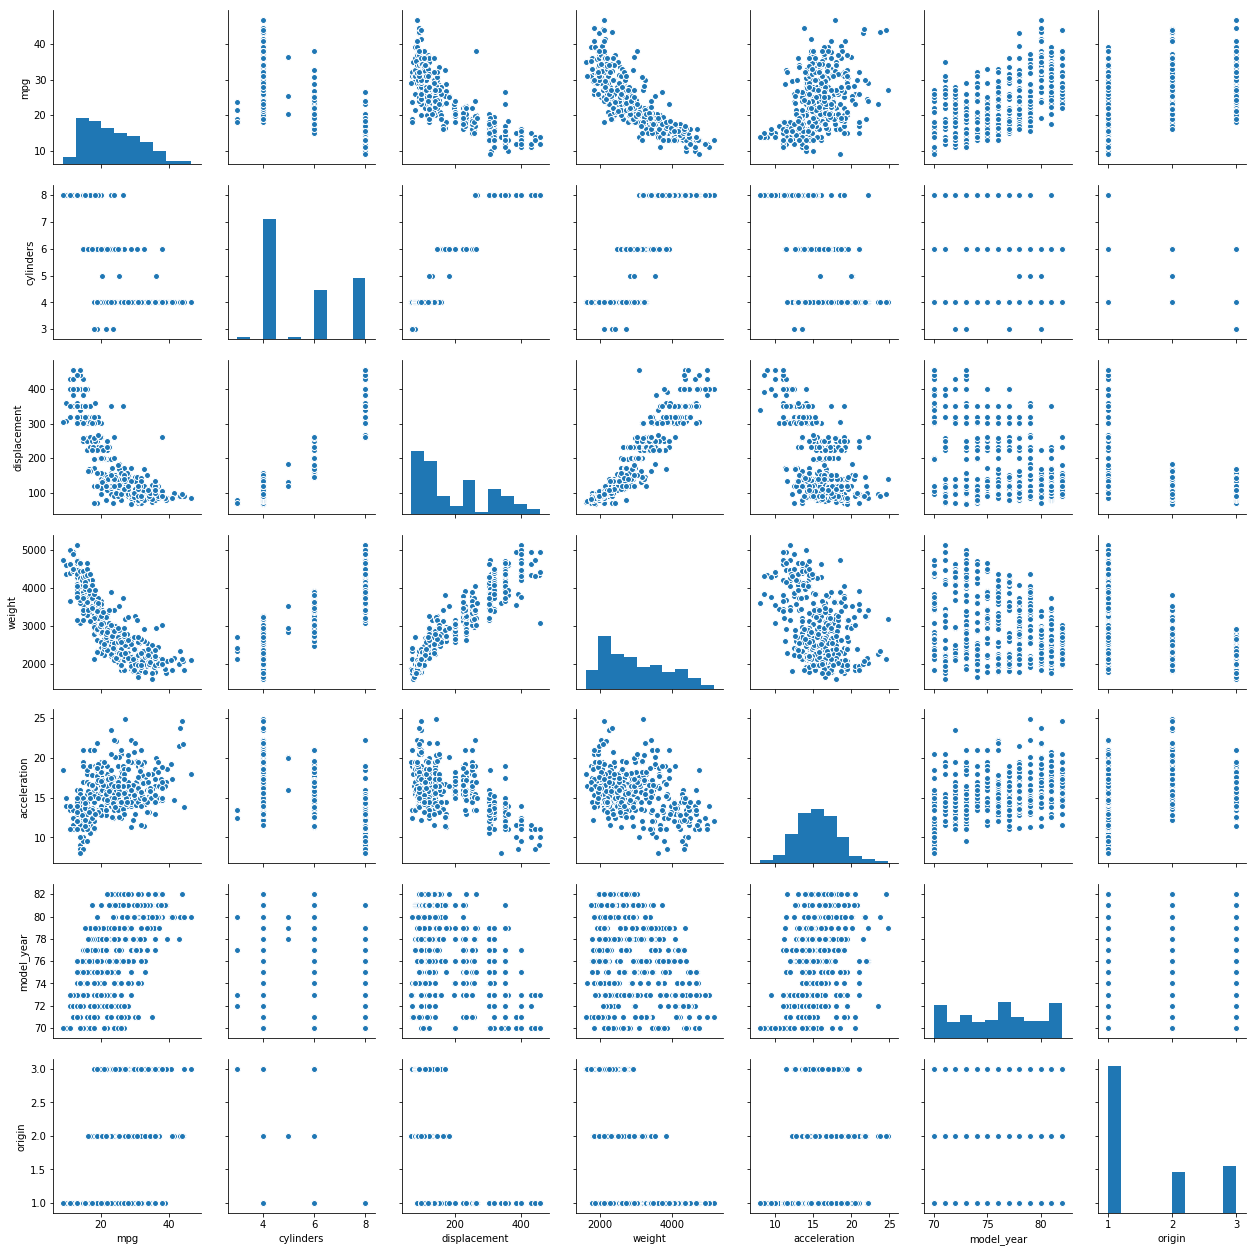

In [45]:
sns.pairplot(df)

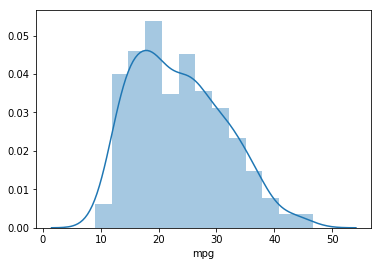

In [46]:
sns.distplot(df['mpg'])

## Cleaning the data

In [47]:
df['horsepower']=df['horsepower'].replace(['?'],[0])

In [48]:
df['horsepower']= df['horsepower'].astype('int64')

In [49]:
df['horsepower']= df['horsepower'].replace([0],[np.nan])

In [50]:
df['horsepower']= df['horsepower'].interpolate()

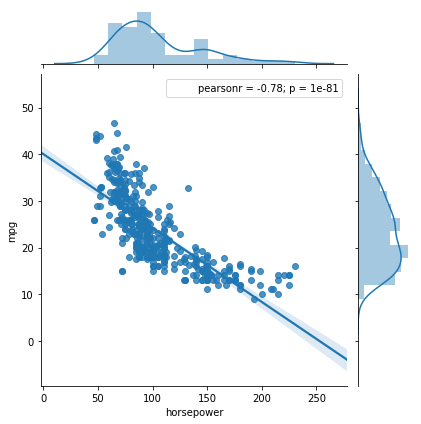

In [51]:
sns.jointplot(x='horsepower',y='mpg',data=df,kind ='reg')

## Converting categorical variables to dummy variables 

In [52]:
model_year_1=pd.get_dummies(df['model_year'],drop_first = True)

In [53]:
origin_1 =pd.get_dummies(df['origin'], drop_first = True)

In [54]:
df=pd.concat([df,model_year_1,origin_1], axis=1)

In [55]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,71,...,75,76,77,78,79,80,81,82,2,3
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0,...,0,0,0,0,0,0,0,0,0,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,0,...,0,0,0,0,0,0,0,0,0,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,0,...,0,0,0,0,0,0,0,0,0,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,0,...,0,0,0,0,0,0,0,0,0,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,0,...,0,0,0,0,0,0,0,0,0,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df=df.drop('model_year', axis=1)

In [57]:
df=df.drop(['name'], axis=1)

In [58]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,71,72,73,...,75,76,77,78,79,80,81,82,2,3
0,18.0,8,307.0,130.0,3504,12.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693,11.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436,11.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433,12.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449,10.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,15.0,8,429.0,198.0,4341,10.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,14.0,8,454.0,220.0,4354,9.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,14.0,8,440.0,215.0,4312,8.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,14.0,8,455.0,225.0,4425,10.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,15.0,8,390.0,190.0,3850,8.5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Getting dependent and independent variable for linear regression

In [59]:
X=df.loc[:, df.columns != 'mpg']

In [60]:
y=df['mpg']

## Spliting the data in training and testing dataset

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the data

In [62]:
from sklearn.linear_model import LinearRegression 

In [63]:
lm = LinearRegression()

In [64]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
coefficients=lm.coef_

In [66]:
coefficients

array([ -2.42614054e-01,   2.32275555e-02,  -2.52790637e-02,
        -6.72866528e-03,   1.60069784e-02,   1.21281339e+00,
         4.24575413e-01,  -5.48356204e-01,  -1.13787019e+00,
         1.52233792e+00,  -1.50442347e-02,   1.57609920e+00,
         3.17525962e+00,   2.77740443e+00,   5.66708959e+00,
         8.80278253e+00,   7.21826097e+00,   8.01073669e+00,
         1.42986878e+00,  -1.08527694e-01])

## Testing data

In [67]:
predictions=lm.predict(X_test)

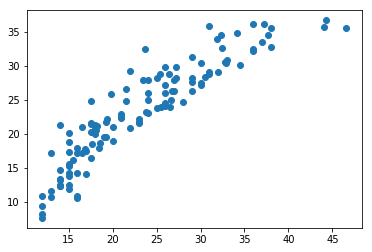

In [68]:
plt.scatter(y_test, predictions)

## Evaluating the output

In [69]:
from sklearn import metrics

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.50502954577
MSE: 10.2010285862
RMSE: 3.19390491189


Text(0,0.5,'Residual')

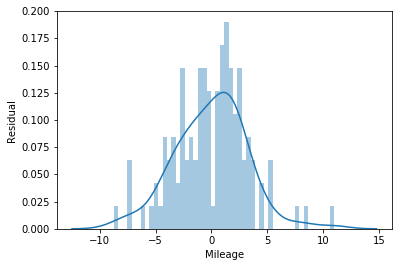

In [71]:
sns.distplot(y_test-predictions, bins=50, kde=True)
plt.xlabel('Mileage')
plt.ylabel('Residual')

In [72]:
coeffs = pd.DataFrame(data=lm.coef_.transpose(), index=X.columns, columns=['Coefficient'])

In [73]:
coeffs

,Coefficient
cylinders,-0.242614
displacement,0.023228
horsepower,-0.025279
weight,-0.006729
acceleration,0.016007
origin,1.212813
71,0.424575
72,-0.548356
73,-1.137870
74,1.522338


In [74]:
metrics.r2_score(y_test,predictions)

0.83723420674094529

## Checking for multicollinearity

In [75]:
corr = np.corrcoef(X, rowvar=0)

In [76]:
corr

array([[  1.00000000e+00,   9.50721390e-01,   8.43095345e-01,
          8.96016795e-01,  -5.05419489e-01,  -5.62543346e-01,
          1.88895359e-02,   5.93712644e-02,   1.81060589e-01,
         -3.10466702e-02,   2.44074478e-02,   3.45919429e-02,
          1.54022370e-03,  -1.73862049e-02,   6.15200922e-02,
         -2.17300460e-01,  -1.37637445e-01,  -2.15765218e-01,
         -3.52861438e-01,  -3.96478765e-01],
       [  9.50721390e-01,   1.00000000e+00,   8.97137597e-01,
          9.32824147e-01,  -5.43684084e-01,  -6.09409399e-01,
          4.31216660e-02,   6.59053968e-02,   2.03658093e-01,
         -5.61752112e-02,   3.31953404e-02,   1.28198418e-02,
         -5.37041527e-03,  -4.73014639e-02,   3.57059482e-02,
         -2.08893808e-01,  -1.56446422e-01,  -1.80162620e-01,
         -3.73886498e-01,  -4.33505444e-01],
       [  8.43095345e-01,   8.97137597e-01,   1.00000000e+00,
          8.63431386e-01,  -6.86554925e-01,  -4.51886189e-01,
          1.83109112e-02,   1.15239455e-01

## Performing Principal Component Analysis

In [77]:
from sklearn.decomposition import PCA

In [78]:
X = X.values

In [79]:
from sklearn.preprocessing import scale

In [80]:
X = scale(X)

In [81]:
pca = PCA(n_components=19)

In [82]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=19, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [83]:
var= pca.explained_variance_ratio_

In [84]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

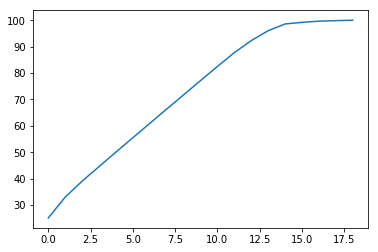

In [85]:
plt.plot(var1)

In [86]:
pca = PCA(n_components=12)

In [88]:
pca.fit(X)
X1=pca.fit_transform(X)

In [89]:
pd.DataFrame(X1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,2.425524,0.351155,0.124435,-0.045429,-0.007957,0.041922,0.007978,0.051308,0.021612,0.003437,-0.006398,-0.150473
1,3.115039,0.626794,0.014670,-0.037353,-0.004134,0.046704,0.043730,0.024034,0.013366,-0.000912,-0.011828,-0.187984
2,2.746849,0.571643,0.046357,-0.012692,0.025421,0.060464,0.045226,0.054803,0.027571,0.001483,-0.008733,-0.140169
3,2.590481,0.448723,0.078815,-0.030650,0.008620,0.047159,0.030605,0.040231,0.013085,0.001382,-0.005990,-0.145025
4,2.629383,0.564349,0.054084,-0.005299,0.034104,0.067222,0.044637,0.068953,0.037108,0.003994,-0.007755,-0.123915
5,4.252878,1.048748,-0.142559,-0.044724,-0.022951,0.051690,0.080292,-0.009133,0.016084,-0.003689,-0.023049,-0.269898
6,4.692828,1.293328,-0.229081,-0.018538,0.001851,0.067405,0.116333,-0.011054,0.021280,-0.006246,-0.026964,-0.274609
7,4.609856,1.311223,-0.231155,-0.005599,0.016536,0.076116,0.121813,0.002083,0.029477,-0.004647,-0.026101,-0.255670
8,4.687612,1.210398,-0.212076,-0.041312,-0.021704,0.051844,0.103653,-0.032888,0.004836,-0.007329,-0.025893,-0.294820
9,3.912859,1.127440,-0.150007,0.019857,0.049784,0.087384,0.110947,0.042597,0.042943,-0.001887,-0.020141,-0.186506


## Performing linear regression after PCA

In [90]:
from sklearn.model_selection import train_test_split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y, test_size=0.3, random_state=101)

In [91]:
lm.fit(X_train_1,y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
coefficients=lm.coef_

In [93]:
coefficients

array([-2.93346422,  0.03510919,  0.88758265,  0.4690521 ,  0.30961178,
        0.02284518, -0.1805384 ,  0.82675998, -0.58776222,  0.25212883,
       -0.80584073, -0.2542489 ])

In [94]:
predictions_1=lm.predict(X_test_1)

In [95]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test_1, predictions_1)
mse = metrics.mean_squared_error(y_test_1, predictions_1)
rmse = np.sqrt(metrics.mean_squared_error(y_test_1, predictions_1))

In [96]:
metrics.r2_score(y_test_1,predictions_1)

0.7935503374342382

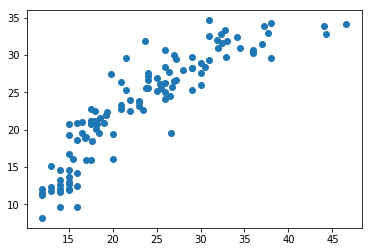

In [97]:
plt.scatter(y_test_1, predictions_1)

In [98]:
print('MAE:', metrics.mean_absolute_error(y_test_1, predictions_1))
print('MSE:', metrics.mean_squared_error(y_test_1, predictions_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_1, predictions_1)))

MAE: 2.73883987574
MSE: 12.9388298811
RMSE: 3.59705850399


## Considering square terms of independent variables to increase accuracy of model

In [99]:
df2=df

In [100]:
df2['hp2'] = df['horsepower']*df['horsepower']

In [101]:
df2['disp2']= df['displacement']*df['displacement']

In [102]:
df2['wt2']= df['weight']*df['weight']

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 24 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
origin          398 non-null int64
71              398 non-null uint8
72              398 non-null uint8
73              398 non-null uint8
74              398 non-null uint8
75              398 non-null uint8
76              398 non-null uint8
77              398 non-null uint8
78              398 non-null uint8
79              398 non-null uint8
80              398 non-null uint8
81              398 non-null uint8
82              398 non-null uint8
2               398 non-null uint8
3               398 non-null uint8
hp2             398 non-null float64
disp2           398 non-null float64
wt2             398 non-null int64
dtypes: float64(6), int64(4), uint8(14)
mem

In [104]:
X=df2.loc[:, df.columns != 'mpg']

In [105]:
y = df['mpg']

## Performing regression

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [107]:
from sklearn.linear_model import LinearRegression 

In [108]:
lm = LinearRegression()

In [109]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
coefficients=lm.coef_

In [111]:
coefficients

array([  3.18651100e-01,  -7.18016799e-03,  -1.51077125e-01,
        -1.43223044e-02,  -1.63978701e-01,   6.16968953e-01,
        -9.54107373e-02,  -9.46472387e-01,  -1.28394991e+00,
         6.40726564e-01,   2.53567924e-01,   1.27853190e+00,
         2.78746376e+00,   3.03074939e+00,   5.60560241e+00,
         8.32788344e+00,   6.35719744e+00,   7.96277447e+00,
         1.04886928e+00,  -2.15950165e-01,   3.64948622e-04,
         2.46274867e-05,   1.49742300e-06])

In [112]:
predictions=lm.predict(X_test)

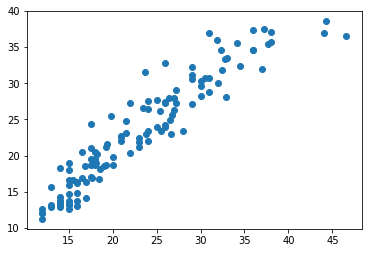

In [113]:
plt.scatter(y_test, predictions)

## Evaluating the model

In [114]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.96704281581
MSE: 7.16079706466
RMSE: 2.67596656643


In [115]:
metrics.r2_score(y_test,predictions)

0.88574359881948961

In [116]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
cylinders,0.318651
displacement,-0.007180
horsepower,-0.151077
weight,-0.014322
acceleration,-0.163979
origin,0.616969
71,-0.095411
72,-0.946472
73,-1.283950
74,0.640727


Text(0,0.5,'Residual')

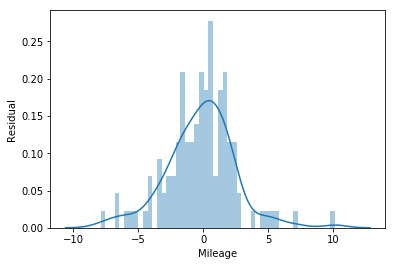

In [117]:
sns.distplot(y_test-predictions, bins=50, kde=True)
plt.xlabel('Mileage')
plt.ylabel('Residual')

## Conclusion

### Model 1
In linear regression model, obtained r2 is 83.72% and root mean squared error is 3.19.  Cylinders, horsepower, weight are negatively associated with mileage per gallon. Year variables are positively associated with mileage indicating technology is evolving over the time period and increase in mileage per gallon is associated with it.  

### Model 2
As there is high collinearity in data, I applied PCA to reduce dimensionality. But that increased root mean squared error to 3.60 and decreased r2 to 79.35%.

### Model 3
In third model I considered quadratic terms horsepower square, displacement square and weight square as there is quadratic relation between these variables and mileage per gallon. This model reduced root mean squared error significantly to 2.67 and increased r2 to 88.57% making model highly accurate. The coefficients of these squared terms is positive implying after certain increase in horsepower, displacement, weight mileage per gallon starts increasing instead of decreasing. To find out effect of these variables we have to find out marginal effect by taking deriavative wrt these terms.